In [34]:

#pip install graphviz
#pip install pydotplus
#pip install decision-tree-id3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree #For our Decision Tree
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
golf = pd.read_csv('golf_dataset_Binary.csv')


In [35]:
golf.head(5)
#golf.Outlook.unique()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,no
1,Sunny,Hot,High,True,no
2,Rain,Hot,High,False,no
3,Rain,Cool,Normal,False,yes
4,Rain,Cool,Normal,True,no


In [36]:
#factorize makes a categorical attribute to a numerical represetation
golf['Outlook'],_ = pd.factorize(golf['Outlook'])
golf['Temperature'],_ = pd.factorize(golf['Temperature'])
golf['Humidity'],_ = pd.factorize(golf['Humidity'])
golf['Windy'],_ = pd.factorize(golf['Windy'])
#golf['Play'],_ = pd.factorize(golf['Play'])

In [37]:
print(golf)

   Outlook  Temperature  Humidity  Windy Play
0        0            0         0      0   no
1        0            0         0      1   no
2        1            0         0      0   no
3        1            1         1      0  yes
4        1            1         1      1   no
5        0            0         0      0   no
6        0            1         1      0  yes
7        1            0         1      0  yes
8        0            1         1      1  yes
9        1            0         1      1   no


In [38]:
#one hot the data
one_hot_data = golf.loc[:,('Outlook','Temperature','Humidity','Windy')]

In [40]:
# train the decision tree
#dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_train = clf.fit(one_hot_data, golf['Play'])

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Humidity <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]\nclass = Not_Play", fillcolor="#f6d5bd"] ;
1 [label="entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not_Play", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Windy <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = Play", fillcolor="#9ccef2"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Play", fillcolor="#399de5"] ;
2 -> 3 ;
4 [label="Outlook <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = Not_Play", fillcolor="#f2c09c"] ;
2 -> 4 ;
5 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Play", fillcolor="#399de5"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not_Play", fillcolor="#e58139"] ;
4 -> 6 ;
}


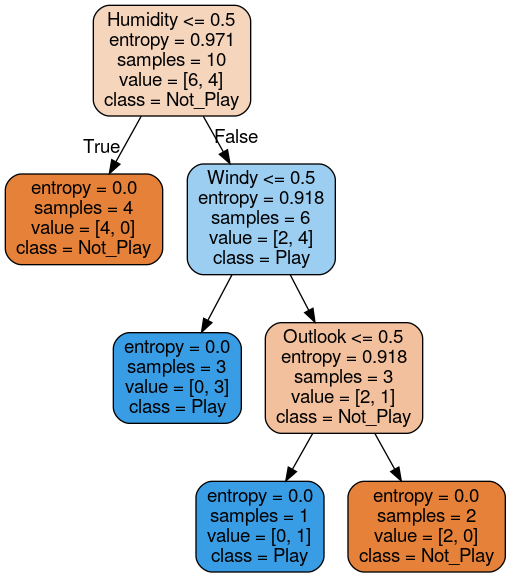

In [44]:
feature_names = golf.columns

dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values),
                                class_names=['Not_Play', 'Play'], rounded = True, filled = True)
print(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())